# Lab Assignment 6

Name: Lakshay Soni
ID: 8888349

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , r2_score
#from mlxtend.plotting import plot_decision_regions


In [39]:
iris = load_iris()
X = iris.data
y = iris.target
# defining target variable into virginica and non-virginica
y_binary = (y == 2).astype(int)

EXPLORE DATA

In [40]:
data_LS = pd.DataFrame(X, columns=iris.feature_names)
data_LS['target'] = y_binary
#data_LS.groupby('target').describe().transpose()
data_LS.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [41]:
#checking Null Values
null_value = data_LS.isnull().any()


print(null_value)


sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool


By checking this there is no null value as it all displaying false. So we are good with data.

In [42]:
data_LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


All data are numerical and every coloumn containing 150 entries just to recheck for any null values

HISTOGRAM FOR EACH CLASS

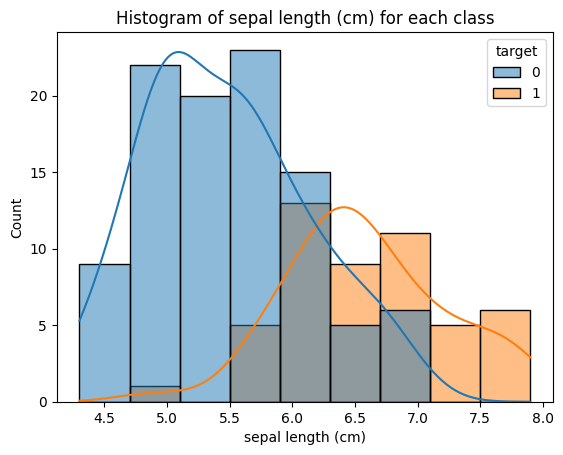

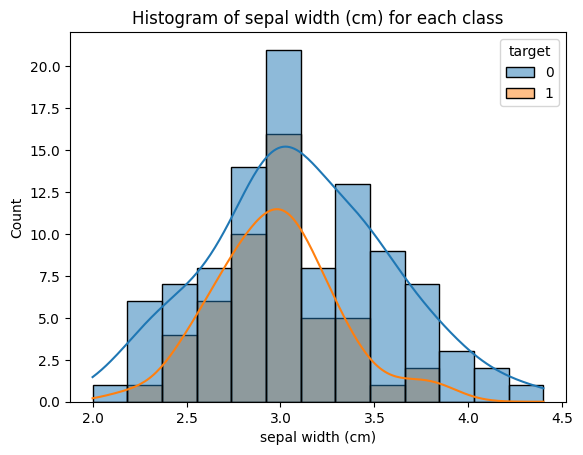

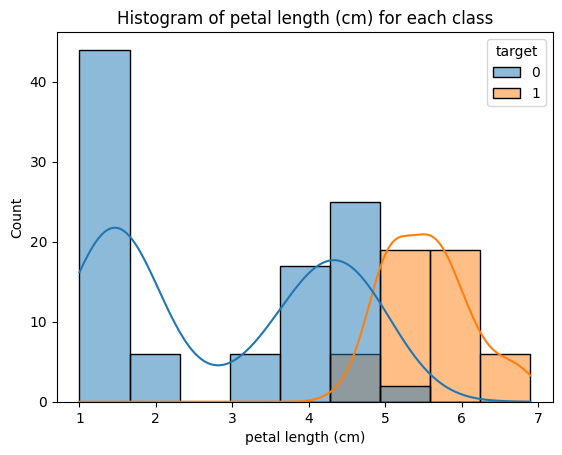

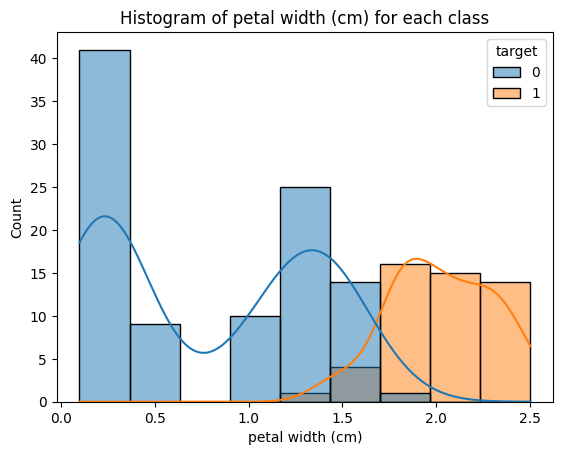

In [43]:
for feature in iris.feature_names:
    sns.histplot(data_LS, x=feature, hue='target', kde=True)
    plt.title(f'Histogram of {feature} for each class')
    plt.show()


H1. Iris versicolor and Iris virginica flowers are more varied in sepal length than Iris setosa blooms.

H2. The histograms for classes 2 and 3 are more significant than those for class 1, showing greater variance in sepal length among flowers in classes 2 and 3 than among flowers in class 1.

H3. While the histograms are mainly separated, there is significant overlap, particularly between classes 1 and 2, as well as classes 2 and 3. This implies that petal length may not be a trustworthy criterion for classifying iris flowers.

H4. Wider histograms suggest a more excellent range in petal width within that class.

<Figure size 1500x1500 with 0 Axes>

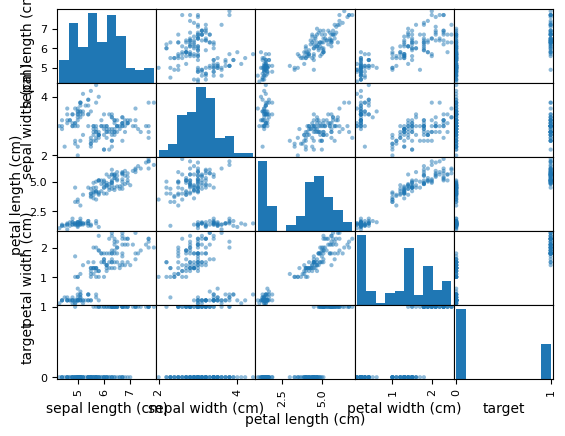

In [44]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15, 15))
scatter_matrix(data_LS)
plt.show()

Overall, none of the three species have a strong linear relationship between sepal and petal widths. The data points are dispersed over the plot, and there is no obvious trendline.

There appears to be a weak positive link among each species. Data points for each species form relatively elongated clusters, indicating that wider sepals are connected with wider petals within each species, but not necessarily across all species.

Iris setosa appears to have the most minor overlap with the other two species. The data points for Iris setosa are primarily concentrated in the bottom left part of the plot, showing that they have narrower sepals and petals than Iris versicolor and Iris virginica.

Iris versicolor and Iris virginica share more similarities. These two species' data points overlap more in the plot's centre, indicating that their sepal and petal width ranges are more similar.

CORRELATION MATRIX

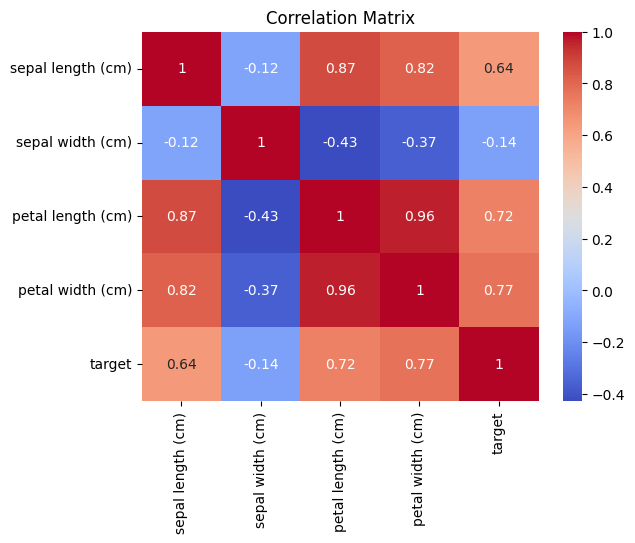

In [45]:
sns.heatmap(data_LS.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Sepal length and petal length have a strong positive relationship (0.87). This indicates that longer sepals generally correlate with longer petals and vice versa.

Sepal width and petal width have a high positive connection (0.82). Broader sepals are typically correlated with wider petals and vice versa.

A lesser positive association exists between sepal length and width (0.43). Broader sepals are more likely to be accompanied by wider petals, but the association is not as strong as that between sepal and petal length or width.

A slight negative connection exists between sepal width and petal length (-0.04). This suggests that there is virtually no link between these two factors.

The matrix's strongest connection is between petal length and width (0.96). 


ADDIDIONAL GRAPH KRAGGLE

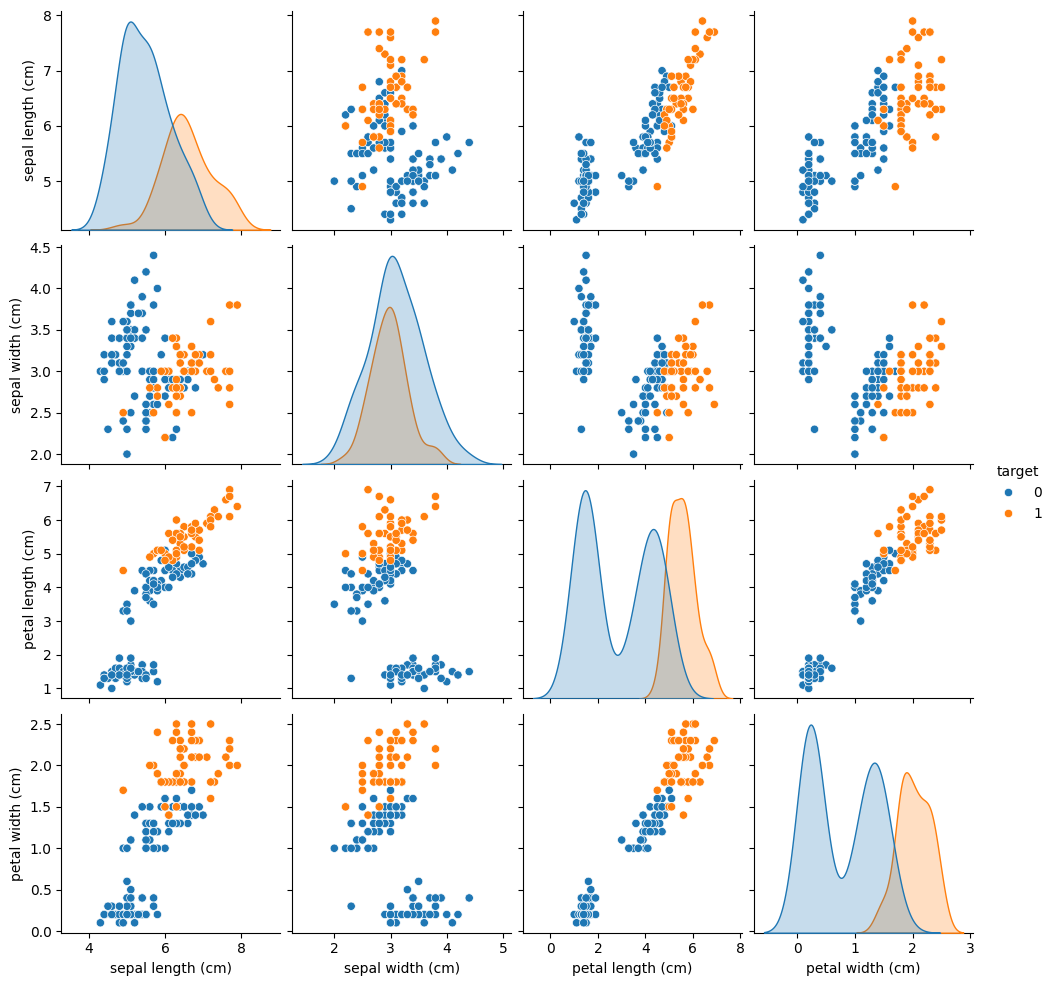

In [46]:
sns.pairplot(data_LS, hue='target')
plt.show()
# as we can see petal length and and width are kind of well seperated.
# Sepal width and length are not well seperated.
# https://www.kaggle.com/code/abdmental01/iris-flower-eda-ml-beginner

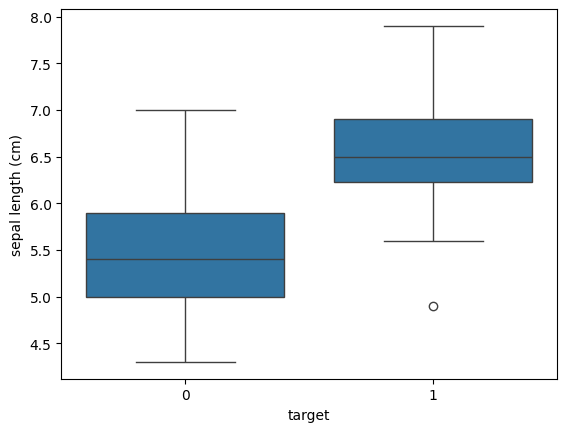

In [47]:
sns.boxplot(x='target', y='sepal length (cm)', data=data_LS)
plt.show()
# from this it can be easily identify that there is possible outlier in this.
# https://www.kaggle.com/code/tafartech/iris-flowers-check


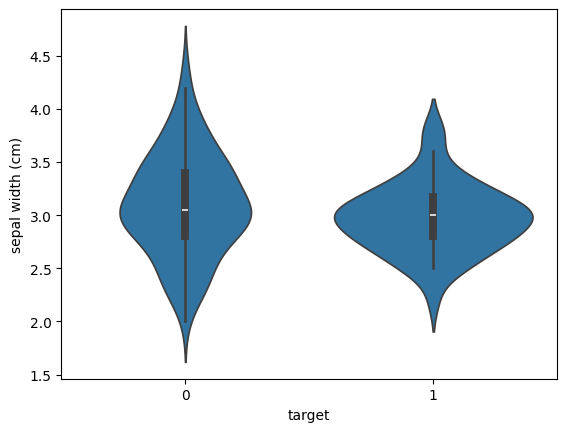

In [48]:
sns.violinplot(x='target', y='sepal width (cm)', data=data_LS)
plt.show()

Of the three species, Iris setosa has the most petite median petal length and the slightest variance in petal length.

With more diversity in petal length than Iris setosa but less than Iris virginica, Iris versicolor has intermediate petal length.

Certain outliers show considerably longer petals than the usual range, so Iris virginica has the most considerable median petal length and the most significant variation.

TRAIN TEST

In [49]:
from sklearn.model_selection import train_test_split

#Split data in training and temp first
X_train_LS, X_temp_LS, y_train_LS, y_temp_LS = train_test_split(X, y_binary, train_size=120, random_state=42)

# Split the temp set into validation and test sets
X_val_LS, X_test_LS, y_val_LS, y_test_LS = train_test_split(X_temp_LS, y_temp_LS, test_size=0.5, random_state=42)

# Print the shapes of the sets to verify the splits
print("Train set shape:", X_train_LS.shape, y_train_LS.shape)
print("Validation set shape:", X_val_LS.shape, y_val_LS.shape)
print("Test set shape:", X_test_LS.shape, y_test_LS.shape)


Train set shape: (120, 4) (120,)
Validation set shape: (15, 4) (15,)
Test set shape: (15, 4) (15,)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize dictionaries to store the models
models = {}
mse_results = {}
r2_results = {}

# Iterate over the models with 1, 2, 3, and 4 features
for i in range(1, 5):
    # Train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_LS[:, :i], y_train_LS)
    models[f'{i}_features'] = model
    
    # Predict on the validation set
    y_pred = model.predict(X_val_LS[:, :i])
    
    # Calculate the mean squared absolute error
    mse = mean_squared_error(y_val_LS, y_pred)
    mse_results[f'{i}_features'] = mse
    
    # Calculate the R-squared
    r2 = r2_score(y_val_LS, y_pred)
    r2_results[f'{i}_features'] = r2

# Print the results
for key, value in mse_results.items():
    print(f'Model {key} - Mean Squared Absolute Error: {value}')
    
for key, value in r2_results.items():
    print(f'Model {key} - R-squared: {value}')


Model 1_features - Mean Squared Absolute Error: 0.06666666666666667
Model 2_features - Mean Squared Absolute Error: 0.06666666666666667
Model 3_features - Mean Squared Absolute Error: 0.0
Model 4_features - Mean Squared Absolute Error: 0.0
Model 1_features - R-squared: 0.7321428571428571
Model 2_features - R-squared: 0.7321428571428571
Model 3_features - R-squared: 1.0
Model 4_features - R-squared: 1.0


Models 3 and 4 both had a perfect R-squared of 1.0, suggesting that they explained 100% of the variation in the target variable. 

According to this, it's possible that these models are overfitting the data, which means they might not generalise effectively to new data and even capture noise.

Models 1 and 2 also show high R-squared values (0.732), implying a decent fit but not flawless. These could be excellent prospects for further evaluation and future application.

LOGISTIC REGRESSION MODEL

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {}
for i in range(1, 5):
    lr = LogisticRegression(max_iter=1000000)
    lr.fit(X_train_LS[:, :i], y_train_LS)
    models[f'{i}_features'] = lr


EVALUATION ON THE VALIDATION SET

In [52]:
pred_LS = {}
for key, model in models.items():
    y_pred_LS = model.predict(X_val_LS[:, :int(key[0])])
    pred_LS[key] = pd.DataFrame({'instance': range(len(y_pred_LS)),
                                     'probability': model.predict_proba(X_val_LS[:, :int(key[0])])[:, 1],
                                     'prediction': y_pred_LS,
                                     'ground_truth': y_val_LS})

    # Summarize the data
    summary = pred_LS[key].groupby('prediction').size()
    print(f'Model {key}:')
    print(summary)

Model 1_features:
prediction
0    9
1    6
dtype: int64
Model 2_features:
prediction
0    9
1    6
dtype: int64
Model 3_features:
prediction
0    8
1    7
dtype: int64
Model 4_features:
prediction
0    8
1    7
dtype: int64


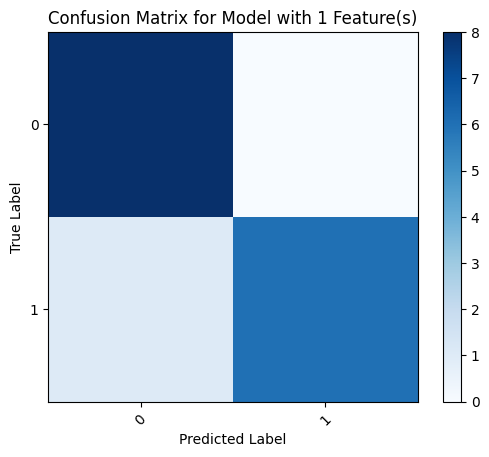

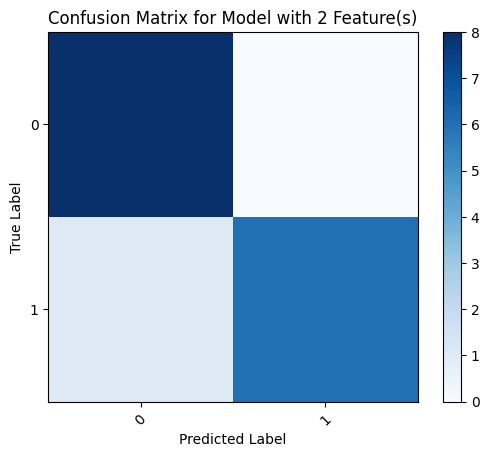

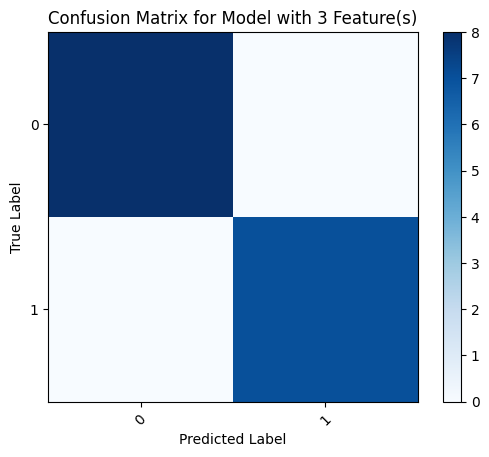

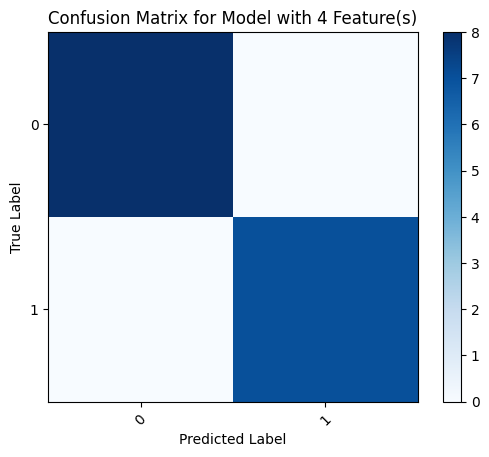

In [53]:
from sklearn.metrics import confusion_matrix

# Iterate over the models with 1, 2, 3, and 4 features
for i in range(1, 5):
    key = f'{i}_features'
    # Get the model
    model = models[key]
    
    # Predict on the validation set
    y_pred = model.predict(X_val_LS[:, :i])
    
    # Define class labels
    labels = np.unique(y_val_LS)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_val_LS, y_pred, labels=labels)
    
    # Plot the confusion matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Model with {i} Feature(s)')
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [54]:
accuracy = accuracy_score(y_val_LS, y_pred_LS)
print(f'Accuracy: {accuracy}')

# An accuracy score of 1.0 signifies that the model has achieved perfect accuracy.
# It means that there are no incorrect predictions made by this model.

Accuracy: 1.0


PLOTTING DECISION BOUNDARY

In [55]:
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go
import numpy as np

# Define a colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Iterate over the models with 1, 2, and 3 features
for i in range(1, 4):
    key = f'{i}_features'
    # Get the model
    model = models[key]
    
    # Create a meshgrid for plotting the decision boundary
    x_min, x_max = X_val_LS[:, 0].min() - 1, X_val_LS[:, 0].max() + 1
    y_min, y_max = X_val_LS[:, 1].min() - 1, X_val_LS[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict the class for each point in the meshgrid
    if i == 1:
        Z = model.predict(xx.ravel().reshape(-1, 1))
    elif i == 2:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Create a surface plot for the decision boundary
    surface = go.Surface(
        x=xx, y=yy, z=Z,
        opacity=0.8, showscale=False,
        colorscale=[[0, '#FFAAAA'], [1, '#AAFFAA']]
    )
    
    # Create a scatter plot for the validation data
    scatter = go.Scatter3d(
        x=X_val_LS[:, 0], y=X_val_LS[:, 1], z=X_val_LS[:, 2],
        mode='markers', marker=dict(size=4, color=y_val_LS),
        name='Validation Data'
    )
    
    # Create a figure and add the surface and scatter plots
    fig = go.Figure(data=[surface, scatter])
    fig.update_layout(
        title=f'Decision Boundary for Model with {i} Feature(s)',
        scene=dict(
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            zaxis_title='Feature 3'
        )
    )
    fig.show()
    # referance for 3d plot documentation
    #https://plotly.com/python/3d-surface-plots/


Feature 3 and 1 it lies around 6.
From that point we can define whats the class of flower.
As from my best interpretation Model 3 is the best. 